In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff
import json
pd.set_option('display.max_rows', None)  # This line allows all rows to be displayed
pd.set_option('display.max_columns', None)  # This line allows all columns to be displayed



# Foco en:

0003' realizado con dataset aumentado en 1000 observaciones mediante un VAE, cromosoma activo 0.1, alpha 0.5, 30 pruebas. 
  


In [2]:
data = pd.read_csv('experiments_results.csv')
data.head()

In [3]:
leukemias = data[data['experiment_name'].str.contains('leukemia_base_0003')]
# extract the firts 18 letters of the experiment name
leukemias['experiment_name'].value_counts()

experiment_name
leukemia_base_0003_0    1
leukemia_base_0003_1    1
leukemia_base_0003_2    1
Name: count, dtype: int64

#### Experimentos excluidos

Excluiremos del análisis experimentos con menos de 30 pruebas, para que la comparación de resultados entre dataset original y aumentado sea en igualdad de condiciones.
Excluimos el experimento 0008 porque corresponde a la exploración de una configuración extrema del parámetro alpha, y no es representativo de la configuración general de los experimentos.

## Exploración de la selección de características

In [4]:
# Replace 'your_file.json' with the path to your JSON file
with open('experiments.json', 'r') as file:
    features = json.load(file)


In [ ]:
# for i in features:
#     print(i)
#     print(features[i]['selected_features_bin'])
#     print('-'*10)

In [5]:
all_features_selected_augmented1000 = []
for i in features:    
    if  '0003' in i:
            all_features_selected_augmented1000 += features[i]['selected_features_bin']
    
                  

Conjunto de features seleccionados en los 3 experimentos al menos una vez

In [6]:
len(set(all_features_selected_augmented1000))

1811

In [7]:
features_augmented = pd.DataFrame({'features_original' : all_features_selected_augmented1000}) \
    .groupby('features_original') \
    .size() \
    .reset_index(name='freq') \
    .sort_values(by='freq', ascending=False) \
    .rename(columns={'features_original': 'features'})

Hay elementos comunes a todas las pruebas en cada experimento? 
No hay elementos comunes a todas las pruebas

In [ ]:
# all_features_selected_original = []
# all_features_selected_augmented = []
# for i in features:    
#     if  '0001' in i:
#             all_features_selected_original.append(features[i]['selected_features_bin'])
#     elif '0002' in i:
#           all_features_selected_augmented.append(features[i]['selected_features_bin'])
# # Convert the first list to a set to start with
# common_elements = set(all_features_selected_augmented[0])
# # Iterate over the rest of the lists and update 'common_elements' to keep only the common elements
# for lst in all_features_selected_original[1:]:
#     common_elements.intersection_update(lst)
# # 'common_elements' now contains only the elements that were present in all lists
# print(common_elements)

set()


## Distribución de frecuencia de los features seleccionados

Text(0.5, 1.0, 'Frecuency of features selected across trials in Augmented Dataset')

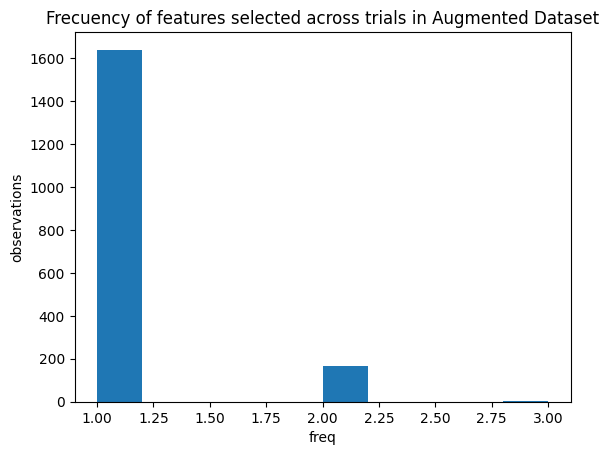

In [8]:
plt.hist(features_augmented['freq'])
plt.xlabel('freq')
plt.ylabel('observations') 
plt.title('Frecuency of features selected across trials in Augmented Dataset')

In [14]:
features_augmented['freq'].value_counts()


freq
1    1639
2     168
3       4
Name: count, dtype: int64